In [3]:
list1 = [30, 60, 90, 120]
list2 = [x for x in list1 if x > 50 and x < 100 ]

list2

[60, 90]

In [23]:
list3 = [30, 60, 90, 120, 150]
import numpy as np
arr1 = np.array(list3)

#boolean array
arr2 = arr1[arr > 100]
arr1, arr2

arr1.mean(), arr1.min() , arr1.max(), arr1.sum()

(90.0, 30, 150, 450)

In [16]:
from timeit import Timer
elapsed = Timer('print("hello world")', 'import pandas as pd').timeit(10)
elapsed

hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world


0.0009542359985061921

In [3]:
import pandas as pd
list = [30, 60, 90, 120, 150]
pdSer = pd.Series(list, name="My Example Name" )
print(pdSer)
print(pdSer.mean(), pdSer.sum())


0     30
1     60
2     90
3    120
4    150
Name: My Example Name, dtype: int64
90.0 450


In [55]:
lTemperatures = [10, 20, 30, 40, 50]
temps_pd = pd.Series(lTemperatures, name="Temperatures")
hot_mask = [False, False, True, True, True]

print("\nFilter element by element:")
hot_pd = temps_pd[hot_mask]
print(hot_pd)

print("\nApply function to all elements:")
cold_mask = temps_pd <= 30
print(cold_mask)

print("\nFilter combining masks:")
hot_and_cold = temps_pd[hot_mask & cold_mask]
print(hot_and_cold)


Filter element by element:
2    30
3    40
4    50
Name: Temperatures, dtype: int64

Apply function to all elements:
0     True
1     True
2     True
3    False
4    False
Name: Temperatures, dtype: bool

Filter combining masks:
2    30
Name: Temperatures, dtype: int64


In [61]:
print("\nFilter by expression")
cold = temps_pd[(temps_pd < 50) & (temps_pd > 15) ]
print(cold)



Filter by expression
1    20
2    30
3    40
Name: Temperatures, dtype: int64


# Series and Indexes

In [82]:
print("Given an existing series with default numerical index (0->4): ")
print(temps_pd)

print("\n...another series with specified string index (A->E): ")
temps_2 = pd.Series(temps_pd.values, index=['A','B' ,'C','D','E'])
print(temps_2)

Given an existing series with default numerical index (0->4): 
0    10
1    20
2    30
3    40
4    50
Name: Temperatures, dtype: int64

...another series with specified string index (A->E): 
A    10
C    20
B    30
D    40
E    50
dtype: int64


In [74]:
dates = pd.date_range('20180929', periods=5 )
temp3 = pd.Series(temps_pd.values, index=dates)
temp3

2018-09-29    10
2018-09-30    20
2018-10-01    30
2018-10-02    40
2018-10-03    50
Freq: D, dtype: int64

In [80]:
temps_2_1 = pd.Series(temps_pd.values, index=['A','B' ,'B','D','E'])
print("Estrazione A: ")
print(temps_2_1['A'])
print("\nEstrazione B: ")
print(temps_2_1['B'])

Estrazione A: 
10

Estrazione B: 
B    20
B    30
dtype: int64


In [12]:
strDates = pd.Series(['2018-09-13', '2018-09-14'])
print("before conversion: " + strDates.dtype.name)
dates = pd.to_datetime(strDates)
dates

before conversion: object


0   2018-09-13
1   2018-09-14
dtype: datetime64[ns]

In [18]:
list = [30, 45, 60, 90 ]
print("Value in list: " + str(45 in list))
ser = pd.Series(list)
print("Value NOT in series: " + str(45 in ser))
print("Value in series VALUES: " + str(45 in ser.values))

Value in list: True
Value NOT in series: False
Value in series VALUES: True


In [20]:
set(ser)

{30, 45, 60, 90}

In [39]:
dict(ser)

{0: 30, 1: 45, 2: 60, 3: 90}

In [26]:
for i, val in ser.iteritems():
    print(i, val)

0 30
1 45
2 60
3 90


In [31]:
ser = pd.Series([30, 45, 60, 90 ])
ser + 2

0    32
1    47
2    62
3    92
dtype: int64

In [32]:
def double(x):
    return x * 2
ser.apply(double)

0     60
1     90
2    120
3    180
dtype: int64

In [41]:
ser1 = pd.Series([30, 45, 60, 90 ], index=['a', 'b', 'c', 'd'])
ser2 = pd.Series([100, 100, 100, 100 ], index=['b', 'c', 'd', 'e'])
ser1 + ser2

a      NaN
b    145.0
c    160.0
d    190.0
e      NaN
dtype: float64

In [46]:
ser1 = pd.Series([10, 15, 20, 10 ], index=['a', 'b', 'b', 'c'])
ser2 = pd.Series([-100, -200 , 100, 200 ], index=['a', 'a', 'b', 'b'])
ser1 + ser2

a    -90.0
a   -190.0
b    115.0
b    215.0
b    120.0
b    220.0
c      NaN
dtype: float64

In [58]:
ser = pd.Series([30, 45, 60, 90 ])
ser[0] # 30 <--label (index value)
#ser[-1] # error (-1  not found in index)
ser.loc[0] # 30 <--label (index value)
ser.iloc[-1] #90 <-- position

90

In [65]:
ser = pd.Series([30, 45, 60, 90 ], index=['a','b','c','d'])
ser['a'] # 30 <--label (index value)
ser[-1] # 90 <-- position
#ser.loc[0] # error 
ser.iloc[0] #30 <-- position

30

In [73]:
ser = pd.Series([30, 45, 60, 90 ], index=['a','T','c','A SPACE'])
ser.a #<-- 30
ser.T # Capital T is a reserved value for transpose method
#ser.A SPACE # invalid sintax


a          30
T          45
c          60
A SPACE    90
dtype: int64

In [78]:
ser = pd.Series([30, 45, 60, 90 ], index=['a','b','c','d'])
ser.loc['a'] = 40
ser.loc['a'] += 100
ser

a    140
b     45
c     60
d     90
dtype: int64

In [83]:
ser = pd.Series([30, 45, 60, 90 ], index=['a','b','c','d'])
ser2 = ser.append(pd.Series([1000 ], index=['e']))
ser ##not changed
ser2 

a      30
b      45
c      60
d      90
e    1000
dtype: int64

In [126]:
ser = pd.Series([30, 45, 60, 90 ], index=['a','b','c','d'])
del ser['a']
ser

b    45
c    60
d    90
dtype: int64

In [122]:
ser = pd.Series([30, 45, 60, 90 ], index=['a','b','c','d'])
mask = (ser.index == 'a') | (ser.index == 'b')
ser[mask]

a    30
b    45
dtype: int64

In [128]:
ser = pd.Series([30, 45, 60, 90 ])
ser.describe()

count     4.000000
mean     56.250000
std      25.617377
min      30.000000
25%      41.250000
50%      52.500000
75%      67.500000
max      90.000000
dtype: float64

In [131]:
ser = pd.Series(["Metallo", "Plastica", "Metallo", "Legno",  "Legno" , "Legno", "Pietra" ], dtype='category')
ser.describe()

count         7
unique        4
top       Legno
freq          3
dtype: object

In [137]:
ser = pd.Series(["Metallo", "Plastica", "Metallo", "Legno",  "Legno" , "Legno", "Pietra" ], dtype='category')
ser.duplicated().any() # True
ser.duplicated().all() # False
ser.duplicated()

0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [146]:
mask = ser.duplicated(keep='first') #first value is not considered duplicated (default)
ser[~mask] # ~ mean NOT

0     Metallo
1    Plastica
3       Legno
6      Pietra
dtype: category
Categories (4, object): [Legno, Metallo, Pietra, Plastica]

In [159]:
ser = pd.Series(["10", "15", 20, 10 ], index=['a', 'b', 'b', 'c'])
pd.Series(ser.loc['b']) #ok from series to series
pd.Series(ser.loc['a']) #ok from object to series

0    10
dtype: object

In [163]:
ser = pd.Series(["10", "15", None ])
ser

0    10.0
1    15.0
2     NaN
dtype: float64

In [171]:
ser = pd.Series([10, 10, None ])
len(ser) # 3 elements: Nan is considered from len but not from count
ser.describe()

LEN: 3


count     2.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
dtype: float64

In [174]:
ser = pd.Series([10, 10, None ])
mask = ser.isnull() #  False , False , True
mask.any() #True
ser[~mask]


0    10.0
1    10.0
dtype: float64

In [175]:
ser = pd.Series([10, 10, None ])
ser.fillna(-1)

0    10.0
1    10.0
2    -1.0
dtype: float64

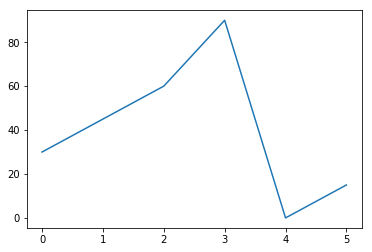

In [189]:
#Jupyter setting
%matplotlib inline 
import matplotlib.pyplot as plt #import plot lib
ser = ser = pd.Series([30, 45, 60, 90, 0, 15 ])
plt = ser.plot()

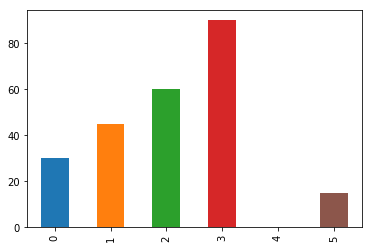

In [191]:
ser.plot.bar()

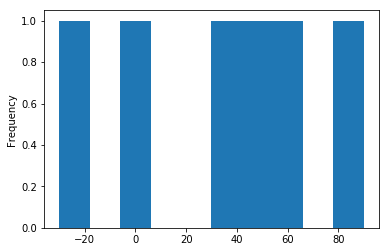

In [184]:
ser.plot.hist()

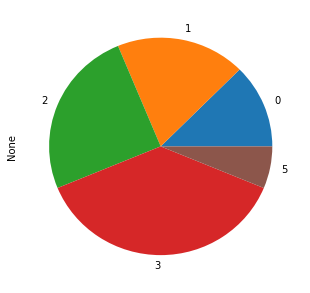

In [194]:
ser.plot.pie(figsize=(5,5))

In [206]:
ser = pd.Series([30, 45, 60, 90, 0, 15 ])
ser.name="Temperature"
ser.to_csv("out/Ser.csv", header=True, index_label="My Index")

In [207]:
cat "out/Ser.csv"

My Index,Temperature
0,30
1,45
2,60
3,90
4,0
5,15


In [224]:
dataFrame = pd.read_csv("out/Ser.csv")
dataFrame["Temperature"]

0    30
1    45
2    60
3    90
4     0
5    15
Name: Temperature, dtype: int64